In [2]:
import pandas as pd 
import numpy as np

In [4]:
df = pd.read_csv('final_data.csv', index_col='Date', parse_dates=True)
df = df.dropna()
print(df.shape)
df

(7460, 1)


,Price
Date,
2002-01-03,3835.000000
2002-01-04,3835.000000
2002-01-05,3835.000000
2002-01-06,3835.000000
2002-01-07,3835.000000
...,...
2022-06-02,4051.000000
2022-06-03,4050.000000
2022-06-04,4050.333333


<AxesSubplot:xlabel='Date'>

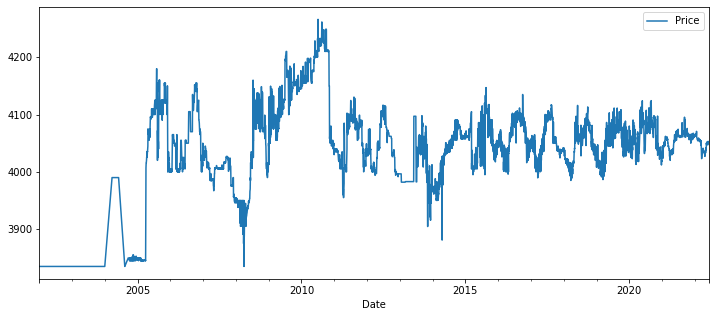

In [5]:
df.plot(figsize=(12,5))

In [10]:
#Check for stationarity
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [11]:
ad_test(df)

1. ADF :  -3.26583594811203
2. P-Value :  0.016476408530292298
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression: 7430
5. Critical Values :
	 1% :  -3.4312304253914205
	 5% :  -2.861929080831393
	 10% :  -2.56697710337307


In [12]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [14]:
stepwise_fit = auto_arima(df, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=57261.498, Time=2.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57953.261, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57488.603, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=57362.625, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57951.306, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=57263.923, Time=1.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57262.921, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=57266.109, Time=1.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=57263.357, Time=3.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=57269.434, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=57263.191, Time=2.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=57262.764, Time=1.46 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=57263.672, Time=2.85 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=57259.673, Time=1.27 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7460
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -28621.482
Date:                Tue, 18 Apr 2023   AIC                          57256.964
Time:                        14:55:27   BIC                          57305.384
Sample:                    01-03-2002   HQIC                         57273.595
                         - 06-06-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2435      0.051    -24.567      0.000      -1.343      -1.144
ar.L2         -0.1567      0.042     -3.770      0.000      -0.238      -0.075
ar.L3          0.3690      0.021     17.774      0.000       0.328       0.410
ma.L1          0.9579      0.051     18.704      0.000       0.858       1.058
ma.L2         -0.2827      0.036     -7.780      0.000      -0.354      -0.211
ma.L3         -0.5906      0.028    -21.347      0.000      -0.645      -0.536
sigma2       126.3915      0.620    203.879      0.000     125.176     127.607
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):            170201.86
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.25
Prob(H) (two-sided):                  0.04   Kurtosis:                        26.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
print(df.shape)
train = df.iloc[:-1000]
test = df.iloc[-1000:]
print(train.shape, test.shape)

(7460, 1)
(6460, 1) (1000, 1)


In [33]:
model = ARIMA(train, order=(3,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 6460
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -24983.758
Date:                Tue, 18 Apr 2023   AIC                          49981.516
Time:                        15:07:27   BIC                          50028.929
Sample:                    01-03-2002   HQIC                         49997.920
                         - 09-10-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6840      0.031    -22.318      0.000      -0.744      -0.624
ar.L2         -0.4993      0.032    -15.566      0.000      -0.562      -0.436
ar.L3          0.3233      0.022     14.399      0.000       0.279       0.367
ma.L1          0.3974      0.030     13.172      0.000       0.338       0.457
ma.L2          0.2164      0.031      6.937      0.000       0.155       0.278
ma.L3         -0.5918      0.023    -25.241      0.000      -0.638      -0.546
sigma2       134.0102      0.699    191.735      0.000     132.640     135.380
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):            147332.13
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, type='levels')
print(pred)

2019-09-11    4080.367898
2019-09-12    4080.847834
2019-09-13    4081.766424
2019-09-14    4081.751298
2019-09-15    4081.458155
                 ...     
2022-06-02    4081.754794
2022-06-03    4081.754794
2022-06-04    4081.754794
2022-06-05    4081.754794
2022-06-06    4081.754794
Freq: D, Name: predicted_mean, Length: 1000, dtype: float64


<AxesSubplot:xlabel='Date'>

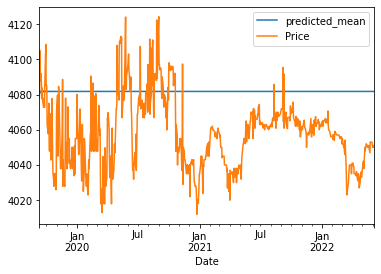

In [35]:
pred.plot(legend=True)
test['Price'].plot(legend=True)

In [36]:
test.mean()

Price    4057.92165
dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Price'].mean()
rmse=sqrt(mean_squared_error(pred,test['Price']))
print(rmse)

30.790231587607582


In [38]:
index_future_date = pd.date_range(start='2022-06-06', end='2022-07-06')

In [40]:
pred = model.predict(start=len(df), end=len(df)+30, type='levels').rename('ARIMA Prediction')
pred

2022-06-07    4081.754794
2022-06-08    4081.754794
2022-06-09    4081.754794
2022-06-10    4081.754794
2022-06-11    4081.754794
2022-06-12    4081.754794
2022-06-13    4081.754794
2022-06-14    4081.754794
2022-06-15    4081.754794
2022-06-16    4081.754794
2022-06-17    4081.754794
2022-06-18    4081.754794
2022-06-19    4081.754794
2022-06-20    4081.754794
2022-06-21    4081.754794
2022-06-22    4081.754794
2022-06-23    4081.754794
2022-06-24    4081.754794
2022-06-25    4081.754794
2022-06-26    4081.754794
2022-06-27    4081.754794
2022-06-28    4081.754794
2022-06-29    4081.754794
2022-06-30    4081.754794
2022-07-01    4081.754794
2022-07-02    4081.754794
2022-07-03    4081.754794
2022-07-04    4081.754794
2022-07-05    4081.754794
2022-07-06    4081.754794
2022-07-07    4081.754794
Freq: D, Name: ARIMA Prediction, dtype: float64